In [3]:
import scipy.io
import numpy as np
import scipy as sp
from scipy import signal
import cupy as cp
import matplotlib.pyplot as plt
import os
import time
#67135780

path = '/media/damian/8A4F-A24E/Test11/rec/'

# Evaluation of beamforming grid


### Homogeneous experiment

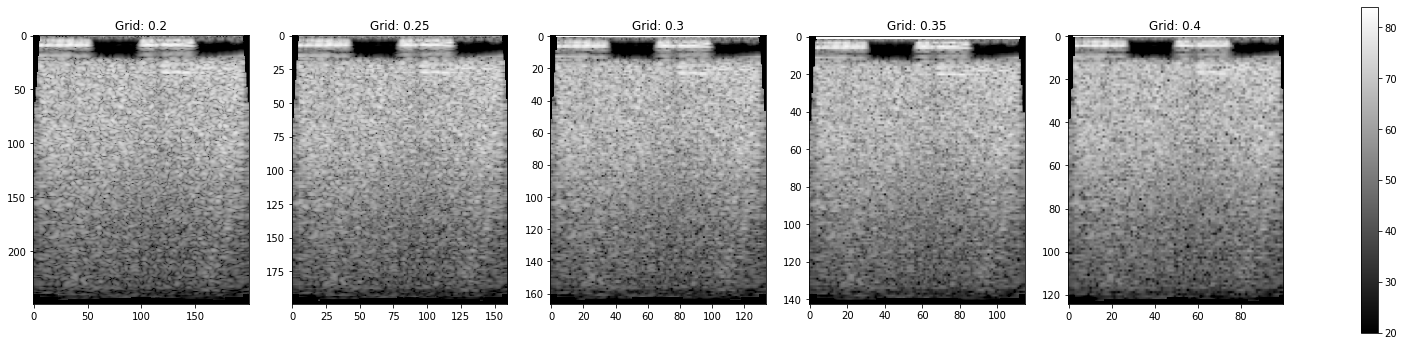

In [4]:
# Plot b-modes
grid = [0.2, 0.25, 0.3, 0.35, 0.4]
datatype = 'bmode'
iFactor = 10
iOrder = 2
idx = 0

# Load data
data = []
for i in grid:
    dataset = sp.io.loadmat(path + 'bmode' + '_grid' + str(i) + '_iFactor' + str(iFactor) + '_iOrder' + str(iOrder) + '_id_' + str(idx) + '.mat') 
    din = dataset["data"]                        
    data.append(din)                        


# Print
dB_range = [20, 84] 
norm = plt.Normalize(dB_range[0], dB_range[1], True)
ax = [] * len(grid)
fig, ax = plt.subplots(1, len(grid), figsize=(28, 6))
for i in range(len(grid)):
    pcm=ax[i].imshow(data[i], cmap='gray', norm=norm)
    ax[i].set_title('Grid: ' + str(grid[i]))

fig.colorbar(pcm, ax=ax)


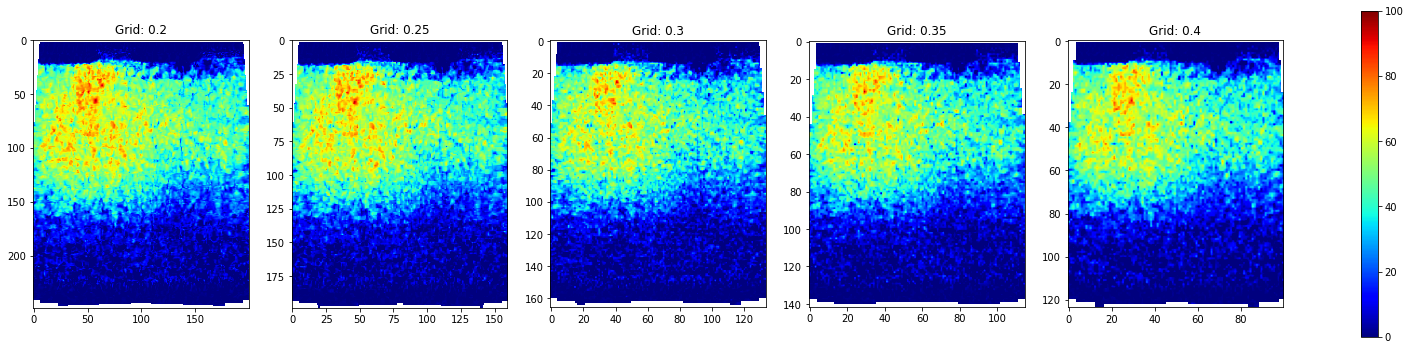

In [5]:
# Plot shear wave SNR maps
grid = [0.2, 0.25, 0.3, 0.35, 0.4]
datatype = 'swSNR'
iFactor = 10
iOrder = 2
idx = 0

# Load data
data = []
for i in grid:
    dataset = sp.io.loadmat(path + datatype + '_grid' + str(i) + '_iFactor' + str(iFactor) + '_iOrder' + str(iOrder) + '_id_' + str(idx) + '.mat') 
    din = dataset["data"]                        
    data.append(din)                        

# Print
dB_range = [0, 100] 
norm = plt.Normalize(dB_range[0], dB_range[1], True)
ax = [] * len(grid)
fig, ax = plt.subplots(1, len(grid), figsize=(28, 6))
for i in range(len(grid)):
    pcm=ax[i].imshow(data[i], cmap='jet', norm=norm)
    ax[i].set_title('Grid: ' + str(grid[i]))

fig.colorbar(pcm, ax=ax)

In [43]:
#Analyze results
# Define ROI
roi_base = np.array([[50, 125], [125, 175]])  # for 0.2 grid
base_grid = 0.2

# Find ROIs
grids = np.array(grid)
scales = 0.2 / grids
roi_c = np.zeros((len(grid), 2, 2))

for i in range(len(grid)):
    roi_c[i, ...] = roi_base * scales[i]

roi_c = roi_c.astype(int)    
#print(roi_c)  

# Calc average SNR in ROIs
avgSNR = [0] * len(grid)
for i in range(len(grid)):
    y1 = int(roi_c[i, 0, 0])
    y2 = int(roi_c[i, 0, 1])
    x1 = int(roi_c[i, 1, 0])
    x2 = int(roi_c[i, 1, 1])
    d = np.array(data[i])
    avgSNR[i] = np.mean(d[y1:y2, x1:x2])

print(avgSNR)    

[44.145084, 42.32899, 39.288723, 39.882412, 39.901405]


(2, 2, 249, 200)
(2, 2, 199, 160)
(2, 2, 166, 134)
(2, 2, 142, 115)
(2, 2, 124, 100)


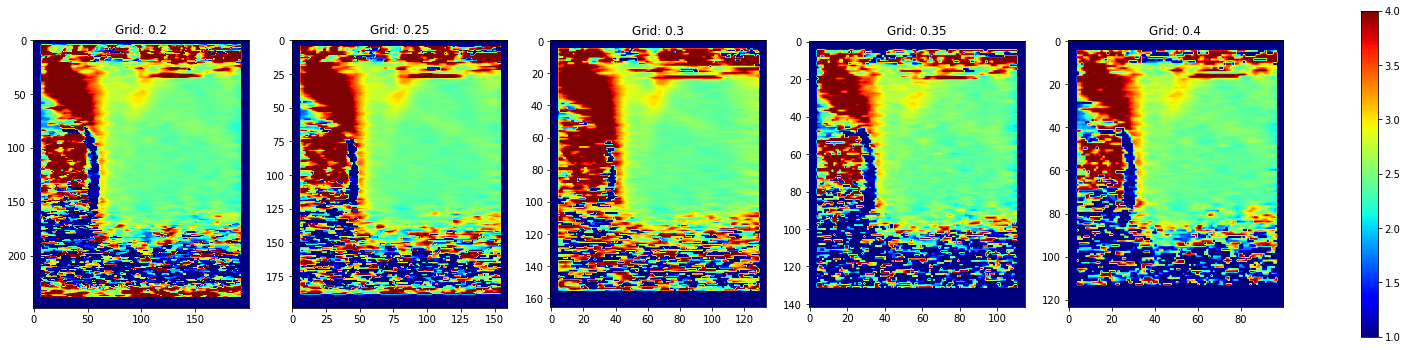

In [45]:
# Plot SWS maps
grid = [0.2, 0.25, 0.3, 0.35, 0.4]
datatype = 'sws'
iFactor = 10
iOrder = 2
idx = 0

# Load data
data = []
for i in grid:
    dataset = sp.io.loadmat(path + datatype + '_grid' + str(i) + '_iFactor' + str(iFactor) + '_iOrder' + str(iOrder) + '_id_' + str(idx) + '.mat') 
    din = dataset["data"] 
    print(din.shape)
    data.append(din[0, 0, :, :])   
    
# Print
SWS_range = [1, 4] 
norm = plt.Normalize(SWS_range[0], SWS_range[1], True)
ax = [] * len(grid)
fig, ax = plt.subplots(1, len(grid), figsize=(28, 6))
for i in range(len(grid)):
    pcm=ax[i].imshow(data[i], cmap='jet', norm=norm)
    ax[i].set_title('Grid: ' + str(grid[i]))

fig.colorbar(pcm, ax=ax)

In [48]:
#Analyze results
# Define ROI
roi_base = np.array([[75, 150], [100, 175]])  # for 0.2 grid
base_grid = 0.2

# Find ROIs
grids = np.array(grid)
scales = 0.2 / grids
roi_c = np.zeros((len(grid), 2, 2))

for i in range(len(grid)):
    roi_c[i, ...] = roi_base * scales[i]

roi_c = roi_c.astype(int)    
#print(roi_c)  

# Calc average SNR in ROIs
avgSNR = [0] * len(grid)
for i in range(len(grid)):
    y1 = int(roi_c[i, 0, 0])
    y2 = int(roi_c[i, 0, 1])
    x1 = int(roi_c[i, 1, 0])
    x2 = int(roi_c[i, 1, 1])
    d = np.array(data[i])
    avgSNR[i] = np.var(d[y1:y2, x1:x2])

print(grid)
print(avgSNR)    

[0.2, 0.25, 0.3, 0.35, 0.4]
[0.0030621251065776605, 0.00248602990374372, 0.0027018063515850594, 0.0061750207204657, 0.004957350972737318]


(2, 2, 249, 200)
(2, 2, 199, 160)
(2, 2, 166, 134)
(2, 2, 142, 115)
(2, 2, 124, 100)


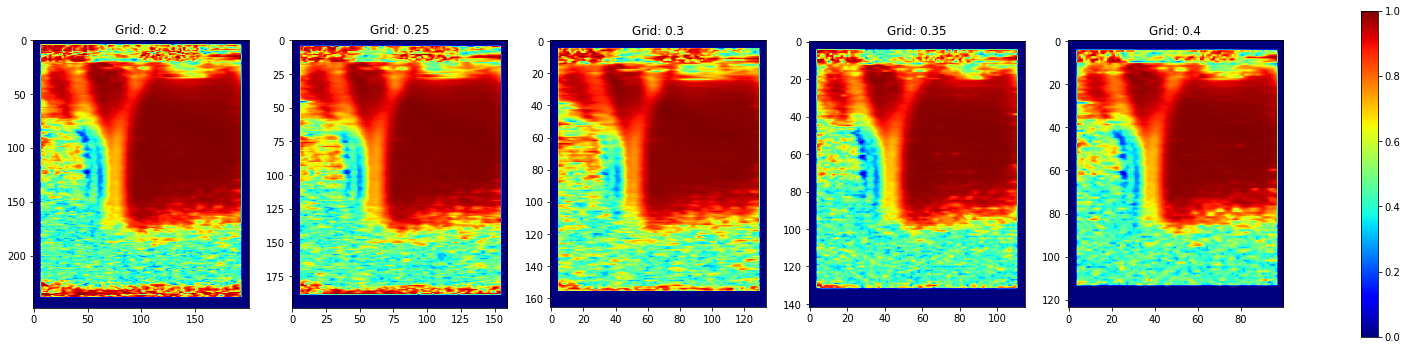

In [49]:
# Plot SWS r maps
grid = [0.2, 0.25, 0.3, 0.35, 0.4]
datatype = 'sws'
iFactor = 10
iOrder = 2
idx = 0

# Load data
data = []
for i in grid:
    dataset = sp.io.loadmat(path + datatype + '_grid' + str(i) + '_iFactor' + str(iFactor) + '_iOrder' + str(iOrder) + '_id_' + str(idx) + '.mat') 
    din = dataset["data"] 
    print(din.shape)
    data.append(din[1, 0, :, :])   
    
# Print
SWS_range = [0, 1] 
norm = plt.Normalize(SWS_range[0], SWS_range[1], True)
ax = [] * len(grid)
fig, ax = plt.subplots(1, len(grid), figsize=(28, 6))
for i in range(len(grid)):
    pcm=ax[i].imshow(data[i], cmap='jet', norm=norm)
    ax[i].set_title('Grid: ' + str(grid[i]))

fig.colorbar(pcm, ax=ax)

In [51]:
#Analyze results
# Define ROI
roi_base = np.array([[75, 150], [100, 175]])  # for 0.2 grid
base_grid = 0.2

# Find ROIs
grids = np.array(grid)
scales = 0.2 / grids
roi_c = np.zeros((len(grid), 2, 2))

for i in range(len(grid)):
    roi_c[i, ...] = roi_base * scales[i]

roi_c = roi_c.astype(int)    
#print(roi_c)  

# Calc average SNR in ROIs
avgSNR = [0] * len(grid)
for i in range(len(grid)):
    y1 = int(roi_c[i, 0, 0])
    y2 = int(roi_c[i, 0, 1])
    x1 = int(roi_c[i, 1, 0])
    x2 = int(roi_c[i, 1, 1])
    d = np.array(data[i])
    avgSNR[i] = np.mean(d[y1:y2, x1:x2])

print(grid)
print(avgSNR)    

[0.2, 0.25, 0.3, 0.35, 0.4]
[0.989100914049827, 0.9884909269968252, 0.9862947949898375, 0.9835998474166565, 0.9846585447586984]


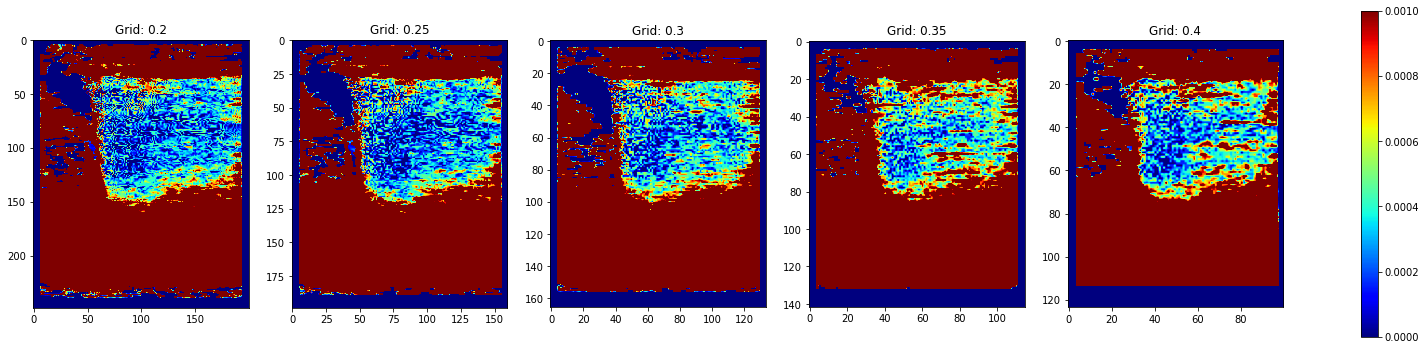

In [52]:
# Plot SWS variance maps
grid = [0.2, 0.25, 0.3, 0.35, 0.4]
idx = range(10)
datatype = 'sws'
iFactor = 10
iOrder = 2

# Load data
data = [0] * len(idx)
var = [0] * len(grid)
for i in range(len(grid)):
    for j in idx:
        dataset = sp.io.loadmat(path + datatype + '_grid' + str(grid[i]) + '_iFactor' + str(iFactor) + '_iOrder' + str(iOrder) + '_id_' + str(j) + '.mat') 
        din = dataset["data"] 
        din = np.squeeze(din[0, 0, :, :])
        if(j==0):
            data = np.zeros([len(idx), din.shape[0], din.shape[1]])
            
        data[j, ...] = din
    
    # Find variance
    var[i] = np.var(data, axis=0)
    
    
    
# Print
var_range = [0, 0.001] 
norm = plt.Normalize(var_range[0], var_range[1], True)
ax = [] * len(grid)
fig, ax = plt.subplots(1, len(grid), figsize=(28, 6))
for i in range(len(grid)):
    pcm=ax[i].imshow(var[i], cmap='jet', norm=norm)
    ax[i].set_title('Grid: ' + str(grid[i]))

fig.colorbar(pcm, ax=ax)

In [54]:
#Analyze results
# Define ROI
roi_base = np.array([[60, 125], [100, 175]])  # for 0.2 grid
base_grid = 0.2

# Find ROIs
grids = np.array(grid)
scales = 0.2 / grids
roi_c = np.zeros((len(grid), 2, 2))

for i in range(len(grid)):
    roi_c[i, ...] = roi_base * scales[i]

roi_c = roi_c.astype(int)    
#print(roi_c)  

# Calc average SNR in ROIs
avgSNR = [0] * len(grid)
for i in range(len(grid)):
    y1 = int(roi_c[i, 0, 0])
    y2 = int(roi_c[i, 0, 1])
    x1 = int(roi_c[i, 1, 0])
    x2 = int(roi_c[i, 1, 1])
    d = np.array(var[i])
    avgSNR[i] = np.mean(d[y1:y2, x1:x2])

print(grid)
print(avgSNR)    

[0.2, 0.25, 0.3, 0.35, 0.4]
[0.00025587539076376713, 0.0002464547926139028, 0.00031446355946631037, 0.0005415940719153754, 0.00048192670138557915]


### Inclusion type IV / SSI

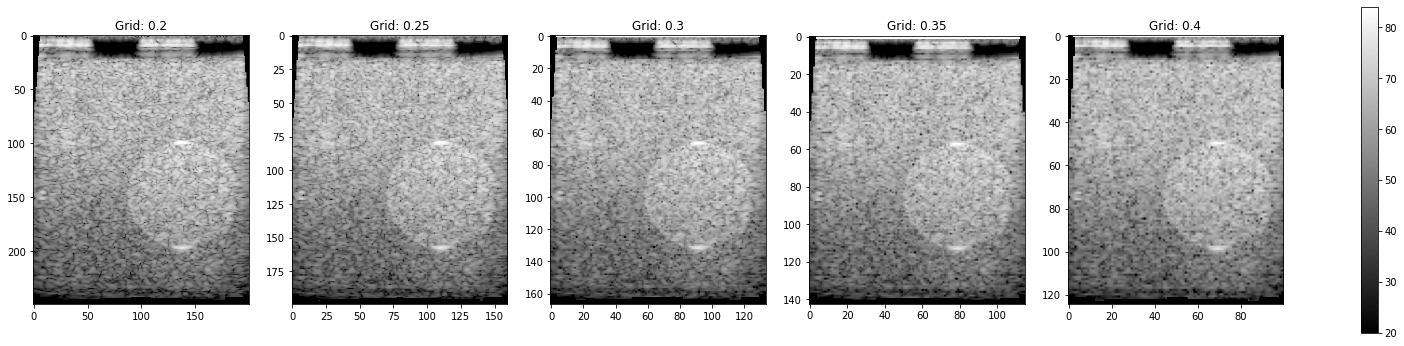

In [37]:
# Plot b-modes
grid = [0.2, 0.25, 0.3, 0.35, 0.4]
datatype = 'bmode'
iFactor = 10
iOrder = 2
idx = 10

# Load data
data = []
for i in grid:
    dataset = sp.io.loadmat(path + 'bmode' + '_grid' + str(i) + '_iFactor' + str(iFactor) + '_iOrder' + str(iOrder) + '_id_' + str(idx) + '.mat') 
    din = dataset["data"]                        
    data.append(din)                        


# Print
dB_range = [20, 84] 
norm = plt.Normalize(dB_range[0], dB_range[1], True)
ax = [] * len(grid)
fig, ax = plt.subplots(1, len(grid), figsize=(28, 6))
for i in range(len(grid)):
    pcm=ax[i].imshow(data[i], cmap='gray', norm=norm)
    ax[i].set_title('Grid: ' + str(grid[i]))

fig.colorbar(pcm, ax=ax)

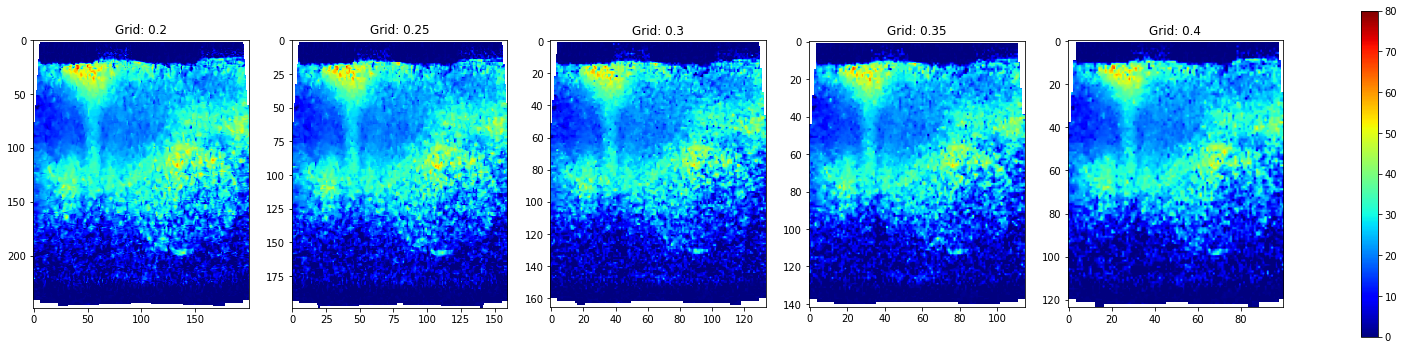

In [38]:
# Plot shear wave SNR maps
grid = [0.2, 0.25, 0.3, 0.35, 0.4]
datatype = 'swSNR'
iFactor = 10
iOrder = 2
idx = 10

# Load data
data = []
for i in grid:
    dataset = sp.io.loadmat(path + datatype + '_grid' + str(i) + '_iFactor' + str(iFactor) + '_iOrder' + str(iOrder) + '_id_' + str(idx) + '.mat') 
    din = dataset["data"]                        
    data.append(din)                        

# Print
dB_range = [0, 80] 
norm = plt.Normalize(dB_range[0], dB_range[1], True)
ax = [] * len(grid)
fig, ax = plt.subplots(1, len(grid), figsize=(28, 6))
for i in range(len(grid)):
    pcm=ax[i].imshow(data[i], cmap='jet', norm=norm)
    ax[i].set_title('Grid: ' + str(grid[i]))

fig.colorbar(pcm, ax=ax)

(2, 2, 124, 100)
(2, 2, 99, 80)
(2, 2, 83, 67)
(2, 2, 71, 58)
(2, 2, 62, 50)


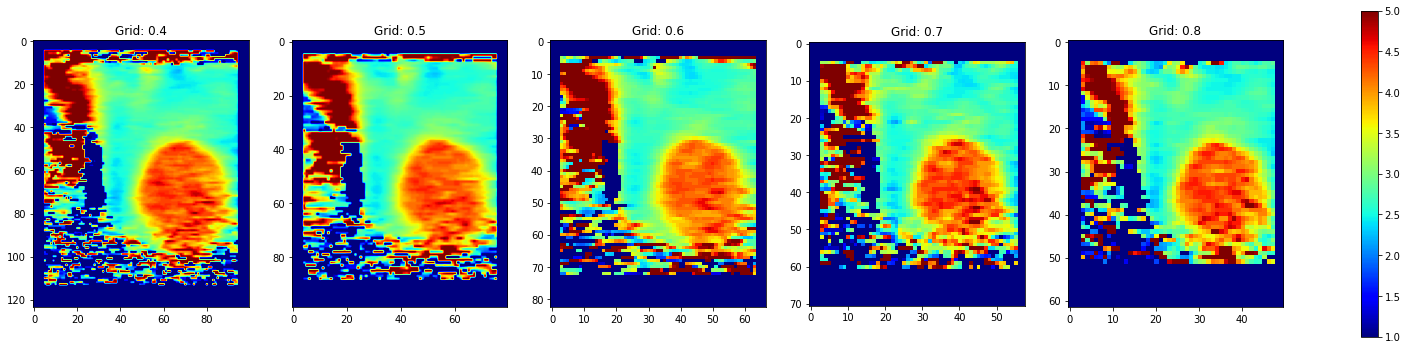

In [49]:
# Plot SWS maps
#grid = [0.2, 0.25, 0.3, 0.35, 0.4]
grid = [0.4, 0.5, 0.6, 0.7, 0.8]
datatype = 'sws'
iFactor = 10
iOrder = 2
idx = 10

# Load data
data = []
for i in grid:
    dataset = sp.io.loadmat(path + datatype + '_grid' + str(i) + '_iFactor' + str(iFactor) + '_iOrder' + str(iOrder) + '_id_' + str(idx) + '.mat') 
    din = dataset["data"] 
    print(din.shape)
    data.append(din[0, 0, :, :])   
    
# Print
SWS_range = [1, 5] 
norm = plt.Normalize(SWS_range[0], SWS_range[1], True)
ax = [] * len(grid)
fig, ax = plt.subplots(1, len(grid), figsize=(28, 6))
for i in range(len(grid)):
    pcm=ax[i].imshow(data[i], cmap='jet', norm=norm)
    ax[i].set_title('Grid: ' + str(grid[i]))

fig.colorbar(pcm, ax=ax)

(2, 2, 249, 200)
(2, 2, 199, 160)
(2, 2, 166, 134)
(2, 2, 142, 115)
(2, 2, 124, 100)


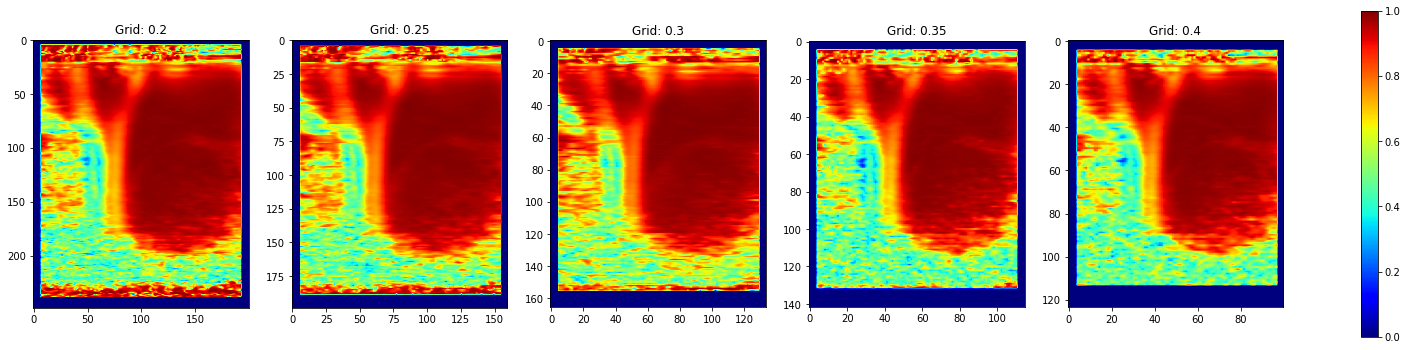

In [40]:
# Plot SWS r maps
grid = [0.2, 0.25, 0.3, 0.35, 0.4]
datatype = 'sws'
iFactor = 10
iOrder = 2
idx = 10

# Load data
data = []
for i in grid:
    dataset = sp.io.loadmat(path + datatype + '_grid' + str(i) + '_iFactor' + str(iFactor) + '_iOrder' + str(iOrder) + '_id_' + str(idx) + '.mat') 
    din = dataset["data"] 
    print(din.shape)
    data.append(din[1, 0, :, :])   
    
# Print
SWS_range = [0, 1] 
norm = plt.Normalize(SWS_range[0], SWS_range[1], True)
ax = [] * len(grid)
fig, ax = plt.subplots(1, len(grid), figsize=(28, 6))
for i in range(len(grid)):
    pcm=ax[i].imshow(data[i], cmap='jet', norm=norm)
    ax[i].set_title('Grid: ' + str(grid[i]))

fig.colorbar(pcm, ax=ax)

### Type IV inclusion / CUSE

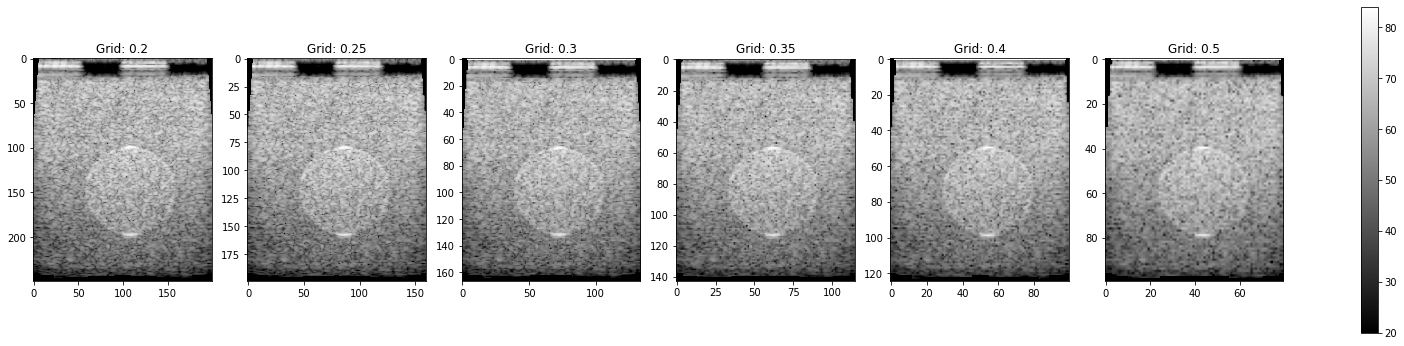

In [73]:
# Plot b-modes
grid = [0.2, 0.25, 0.3, 0.35, 0.4, 0.5]
datatype = 'bmode'
iFactor = 10
iOrder = 2
idx = 61

# Load data
data = []
for i in grid:
    dataset = sp.io.loadmat(path + 'bmode' + '_grid' + str(i) + '_iFactor' + str(iFactor) + '_iOrder' + str(iOrder) + '_id_' + str(idx) + '.mat') 
    din = dataset["data"]                        
    data.append(din)                        


# Print
dB_range = [20, 84] 
norm = plt.Normalize(dB_range[0], dB_range[1], True)
ax = [] * len(grid)
fig, ax = plt.subplots(1, len(grid), figsize=(28, 6))
for i in range(len(grid)):
    pcm=ax[i].imshow(data[i], cmap='gray', norm=norm)
    ax[i].set_title('Grid: ' + str(grid[i]))

fig.colorbar(pcm, ax=ax)

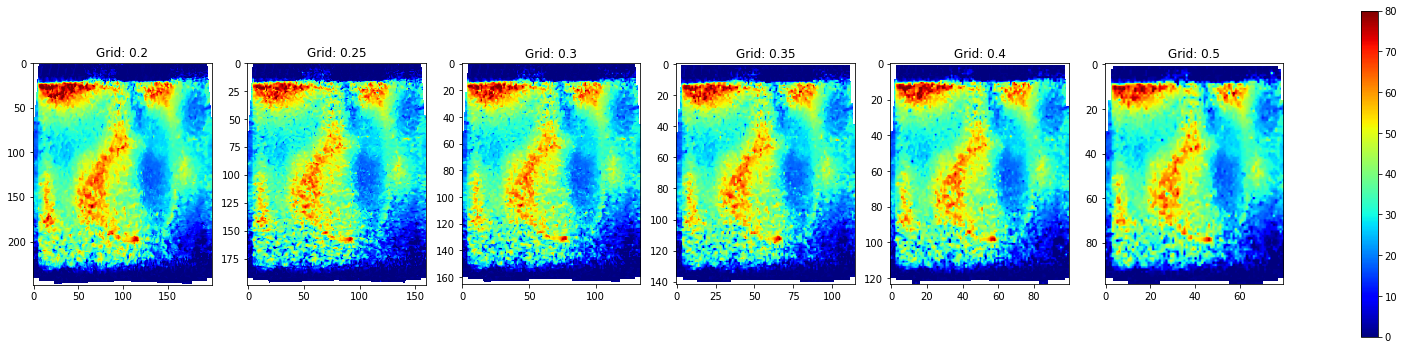

In [74]:
# Plot shear wave SNR maps
grid = [0.2, 0.25, 0.3, 0.35, 0.4, 0.5]
datatype = 'swSNR'
iFactor = 10
iOrder = 2
idx = 61

# Load data
data = []
for i in grid:
    dataset = sp.io.loadmat(path + datatype + '_grid' + str(i) + '_iFactor' + str(iFactor) + '_iOrder' + str(iOrder) + '_id_' + str(idx) + '.mat') 
    din = dataset["data"]                        
    data.append(din)                        

# Print
dB_range = [0, 80] 
norm = plt.Normalize(dB_range[0], dB_range[1], True)
ax = [] * len(grid)
fig, ax = plt.subplots(1, len(grid), figsize=(28, 6))
for i in range(len(grid)):
    pcm=ax[i].imshow(data[i], cmap='jet', norm=norm)
    ax[i].set_title('Grid: ' + str(grid[i]))

fig.colorbar(pcm, ax=ax)

(2, 2, 249, 200)
(2, 2, 199, 160)
(2, 2, 166, 134)
(2, 2, 142, 115)
(2, 2, 124, 100)


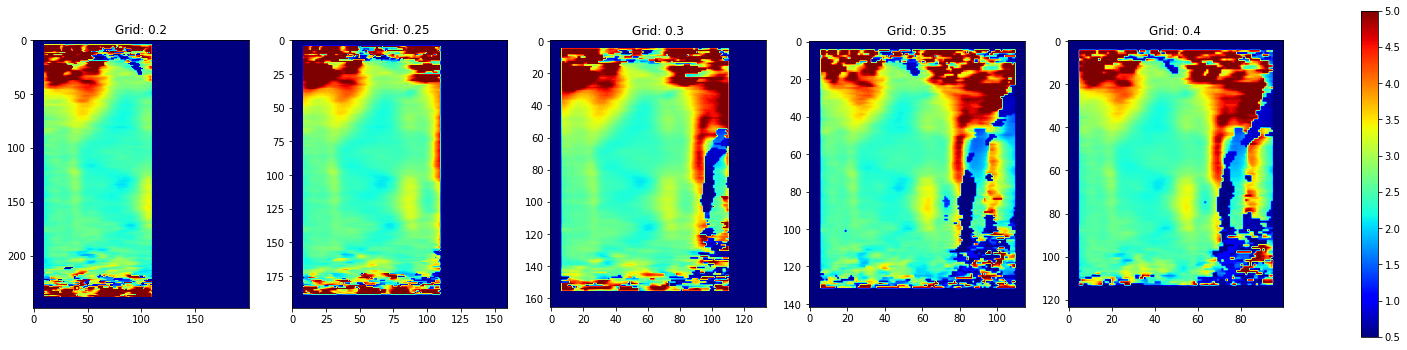

In [87]:
# Plot SWS maps
#grid = [0.2, 0.25, 0.3, 0.35, 0.4]
grid = [0.2, 0.25, 0.3, 0.35, 0.4]
datatype = 'sws'
iFactor = 10
iOrder = 2
idx = 71

# Load data
data = []
for i in grid:
    dataset = sp.io.loadmat(path + datatype + '_grid' + str(i) + '_iFactor' + str(iFactor) + '_iOrder' + str(iOrder) + '_id_' + str(idx) + '.mat') 
    din = dataset["data"] 
    print(din.shape)
    data.append(din[0, 1, :, :])   
    
# Print
SWS_range = [0.5, 5] 
norm = plt.Normalize(SWS_range[0], SWS_range[1], True)
ax = [] * len(grid)
fig, ax = plt.subplots(1, len(grid), figsize=(28, 6))
for i in range(len(grid)):
    pcm=ax[i].imshow(data[i], cmap='jet', norm=norm)
    ax[i].set_title('Grid: ' + str(grid[i]))

fig.colorbar(pcm, ax=ax)

Text(0.5, 1.0, 'r_LR')

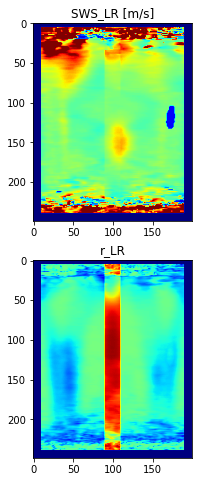

In [88]:
# Compound
from SWE_utils_cupy_standalone import *

datatype = 'sws'
iFactor = 10
iOrder = 2
idx = 71

# Load data
data = []
dataset = sp.io.loadmat(path + datatype + '_grid' + str(0.2) + '_iFactor' + str(iFactor) + '_iOrder' + str(iOrder) + '_id_' + str(idx) + '.mat') 
din = dataset["data"] 
    
SWS_Compounder = SWS_Compounding()
SWS_Compounder.prepare()
SWV = cp.asarray(np.array(din))
SWSc = SWS_Compounder.process(SWV)

# Visualize results
SWSc_cpu  = SWSc.get()
SWS_cpu = np.squeeze(SWSc_cpu[0, ...])
SWS_r_cpu = np.squeeze(SWSc_cpu[1, ...])
sws_range = [0.5, 4.0]
norm_sws = plt.Normalize(0, 5.0, True)
norm_r   = plt.Normalize(0, 2, True)

fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(12, 8))
axs[0].imshow(np.squeeze(SWS_cpu), cmap='jet', norm=norm_sws)
axs[0].set_title('SWS_LR [m/s]')

axs[1].imshow(np.squeeze(SWS_r_cpu), cmap='jet', norm=norm_r)
axs[1].set_title('r_LR')